In [1]:
#CLasificador de Imagenes 

In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import np_utils
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Configuración de paramteros 
width_shape = 224
height_shape = 224
num_classes = 8
epochs = 20
batch_size = 32 

In [4]:
#Ruta del Dataset 
#train_data_dir = r'C:\Users\msantacruz\Downloads\Github2023\Proyecto_Final_Tratamiento_MST\CarneDataset\train'  
#validation_data_dir = r'C:\Users\msantacruz\Downloads\Github2023\Proyecto_Final_Tratamiento_MST\CarneDataset\test'
train_data_dir = 'CarneDataset/train'
validation_data_dir = 'CarneDataset/test'

In [5]:
#Generador de imagenes 
train_datagen = ImageDataGenerator(  
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

valid_datagen = ImageDataGenerator(    
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(  
    validation_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

Found 1633 images belonging to 8 classes.
Found 810 images belonging to 8 classes.


In [6]:
#Numero de imagenes de entrenamiento y validación
nb_train_samples = 1633
nb_validation_samples = 810

In [7]:
#Creación y entrenamiento de modelo CNN
model = Sequential()

inputShape = (height_shape, width_shape, 3)
model.add(Conv2D(32,(3,3), input_shape=inputShape))
model.add(Conv2D(32,(3,3)))
model.add(MaxPool2D())
          
model.add(Conv2D(64,(3,3)))
model.add(Conv2D(64,(3,3)))
model.add(Conv2D(64,(3,3)))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(num_classes,activation='softmax', name='output'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 104, 104, 64)      36928     
                                                        

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

In [9]:

model_history = model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

C:\Users\msantacruz\AppData\Local\Temp\ipykernel_40220\2424806838.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(


Epoch 1/20
51/51 [==============================] - 429s 8s/step - loss: 10.0593 - accuracy: 0.3429 - val_loss: 6.9104 - val_accuracy: 0.3963
Epoch 2/20
51/51 [==============================] - 466s 9s/step - loss: 5.4260 - accuracy: 0.4460 - val_loss: 4.6346 - val_accuracy: 0.4900
Epoch 3/20
51/51 [==============================] - 868s 17s/step - loss: 4.3717 - accuracy: 0.4903 - val_loss: 3.8284 - val_accuracy: 0.5175
Epoch 4/20
51/51 [==============================] - 581s 11s/step - loss: 3.5803 - accuracy: 0.5028 - val_loss: 3.4791 - val_accuracy: 0.4875
Epoch 5/20
51/51 [==============================] - 564s 11s/step - loss: 3.0604 - accuracy: 0.5116 - val_loss: 3.0770 - val_accuracy: 0.5225
Epoch 6/20
51/51 [==============================] - 590s 12s/step - loss: 2.7871 - accuracy: 0.5290 - val_loss: 2.7376 - val_accuracy: 0.5337
Epoch 7/20
51/51 [==============================] - 566s 11s/step - loss: 2.4543 - accuracy: 0.5565 - val_loss: 2.6069 - val_accuracy: 0.5213
Epoch 8

In [10]:
#Transfer Learning modelo VGG16 - solo agregamos capa Dense
image_input = Input(shape=(width_shape, height_shape, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_model = Model(image_input, out)

for layer in custom_model.layers[:-1]:
	layer.trainable = False
    

custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

custom_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model_history = custom_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

C:\Users\msantacruz\AppData\Local\Temp\ipykernel_40220\4283108052.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = custom_model.fit_generator(


Epoch 1/20
51/51 [==============================] - 864s 17s/step - loss: 2.9732 - accuracy: 0.0843 - val_loss: 2.8807 - val_accuracy: 0.1088
Epoch 2/20
51/51 [==============================] - 816s 16s/step - loss: 2.7893 - accuracy: 0.1011 - val_loss: 2.7457 - val_accuracy: 0.1250
Epoch 3/20
51/51 [==============================] - 1666s 11s/step - loss: 2.6668 - accuracy: 0.1099 - val_loss: 2.5687 - val_accuracy: 0.1587
Epoch 4/20
51/51 [==============================] - 991s 20s/step - loss: 2.5140 - accuracy: 0.1399 - val_loss: 2.4900 - val_accuracy: 0.1500
Epoch 5/20
51/51 [==============================] - 1599s 32s/step - loss: 2.3705 - accuracy: 0.1674 - val_loss: 2.3383 - val_accuracy: 0.2087
Epoch 6/20
51/51 [==============================] - 875s 17s/step - loss: 2.2442 - accuracy: 0.1968 - val_loss: 2.2660 - val_accuracy: 0.2013
Epoch 7/20
51/51 [==============================] - 881s 9s/step - loss: 2.1569 - accuracy: 0.2299 - val_loss: 2.1333 - val_accuracy: 0.2425
Epoch

In [12]:
#Transfer Learning modelo VGG16 - fine tune
image_input = Input(shape=(width_shape, height_shape, 3))

model2 = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

model2.summary()

last_layer = model2.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_model = Model(image_input, out)
custom_model.summary()

# freeze all the layers except the dense layers
for layer in custom_model.layers[:-3]:
	layer.trainable = False

custom_model.summary()

custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

 block3_conv2 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_conv3 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_pool (MaxPooling2D)  (None, 28, 28, 256)       0         
                                                                 
 block4_conv1 (Conv2D)       (None, 28, 28, 512)       1180160   
                                                                 
 block4_conv2 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_conv3 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_pool (MaxPooling2D)  (None, 14, 14, 512)       0         
                                                                 
 block5_conv1 (Conv2D)       (None, 14, 14, 512)       2359808   
          

In [13]:
model_history = custom_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

C:\Users\msantacruz\AppData\Local\Temp\ipykernel_40220\4283108052.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = custom_model.fit_generator(


Epoch 1/20
51/51 [==============================] - 432s 9s/step - loss: 9.4572 - accuracy: 0.1230 - val_loss: 7.4324 - val_accuracy: 0.1800
Epoch 2/20
51/51 [==============================] - 903s 18s/step - loss: 6.2030 - accuracy: 0.2748 - val_loss: 5.7749 - val_accuracy: 0.3063
Epoch 3/20
51/51 [==============================] - 876s 17s/step - loss: 5.0837 - accuracy: 0.3560 - val_loss: 4.5813 - val_accuracy: 0.4288
Epoch 4/20
51/51 [==============================] - 920s 18s/step - loss: 4.6133 - accuracy: 0.4185 - val_loss: 4.3536 - val_accuracy: 0.4412
Epoch 5/20
51/51 [==============================] - 911s 18s/step - loss: 4.1652 - accuracy: 0.4491 - val_loss: 4.2647 - val_accuracy: 0.4712
Epoch 6/20
51/51 [==============================] - 922s 18s/step - loss: 3.9117 - accuracy: 0.4666 - val_loss: 3.7496 - val_accuracy: 0.4800
Epoch 7/20
51/51 [==============================] - 788s 15s/step - loss: 3.7009 - accuracy: 0.4891 - val_loss: 3.6919 - val_accuracy: 0.4675
Epoch 8

In [15]:
#Transfer Learning modelo Resnet50 - fine tune
#from keras.applications.resnet50 import ResNet50
#import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50

# Resto del código...

image_input = Input(shape=(width_shape, height_shape, 3))

m_Resnet50 = ResNet50(input_tensor=image_input, include_top=False,weights='imagenet')

m_Resnet50.summary()

last_layer = m_Resnet50.layers[-1].output

x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x=Dropout(0.3)(x)
x = Dense(128, activation='relu', name='fc2')(x)
x=Dropout(0.3)(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_model = Model(image_input, out)
custom_model.summary()

# freeze all the layers except the dense layers
for layer in custom_model.layers[:-6]:
    layer.trainable = False

    
custom_model.summary()

custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

94765736/94765736 [==============================] - 9s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
          

 conv3_block3_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block2_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block1_out[0][0]']       
                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
          

                                )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

                                                                                                  
 conv5_block1_add (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_0_bn[0][0]',      
                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
          

 conv2_block1_1_conv (Conv2D)   (None, 56, 56, 64)   4160        ['pool1_pool[0][0]']             
                                                                                                  
 conv2_block1_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block1_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block1_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block1_1_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block1_1_conv (Conv2D)   (None, 28, 28, 128)  32896       ['conv2_block3_out[0][0]']       
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block1_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block1_1_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv3_block4_1_conv (Conv2D)   (None, 28, 28, 128)  65664       ['conv3_block3_out[0][0]']       
                                                                                                  
 conv3_block4_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block4_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block4_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block4_1_relu[0][0]']    
                                                                                                  
 conv3_blo

                                )                                 'conv4_block2_3_bn[0][0]']      
                                                                                                  
 conv4_block2_out (Activation)  (None, 14, 14, 1024  0           ['conv4_block2_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block2_out[0][0]']       
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block5_add (Add)         (None, 14, 14, 1024  0           ['conv4_block4_out[0][0]',       
                                )                                 'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_block5_out (Activation)  (None, 14, 14, 1024  0           ['conv4_block5_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block6_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block5_out[0][0]']       
                                                                                                  
 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
          

 conv5_block2_3_bn (BatchNormal  (None, 7, 7, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_block2_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block2_add[0][0]']       
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block2_out[0][0]']       
                                                                                                  
 conv5_blo

                                                                                                  
 conv2_block1_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block1_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block1_0_conv (Conv2D)   (None, 56, 56, 256)  16640       ['pool1_pool[0][0]']             
                                                                                                  
 conv2_block1_3_conv (Conv2D)   (None, 56, 56, 256)  16640       ['conv2_block1_2_relu[0][0]']    
                                                                                                  
 conv2_block1_0_bn (BatchNormal  (None, 56, 56, 256)  1024       ['conv2_block1_0_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block1_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block1_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block1_0_conv (Conv2D)   (None, 28, 28, 512)  131584      ['conv2_block3_out[0][0]']       
                                                                                                  
 conv3_block1_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block1_2_relu[0][0]']    
                                                                                                  
 conv3_block1_0_bn (BatchNormal  (None, 28, 28, 512)  2048       ['conv3_block1_0_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block4_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block4_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block4_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block4_2_relu[0][0]']    
                                                                                                  
 conv3_block4_3_bn (BatchNormal  (None, 28, 28, 512)  2048       ['conv3_block4_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block4_add (Add)         (None, 28, 28, 512)  0           ['conv3_block3_out[0][0]',       
          

                                                                                                  
 conv4_block3_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block3_1_relu[0][0]']    
                                                                                                  
 conv4_block3_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block6_1_relu[0][0]']    
                                                                                                  
 conv4_block6_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

                                                                                                  
 conv5_block3_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, 7, 7, 512)    2359808     ['conv5_block3_1_relu[0][0]']    
                                                                                                  
 conv5_block3_2_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_2_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block3_2_bn[0][0]']      
 n)       

In [20]:
model_history = custom_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

C:\Users\msantacruz\AppData\Local\Temp\ipykernel_40220\4283108052.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = custom_model.fit_generator(


Epoch 1/20
51/51 [==============================] - 335s 7s/step - loss: 2.2352 - accuracy: 0.3498 - val_loss: 1.4833 - val_accuracy: 0.5650
Epoch 2/20
51/51 [==============================] - 387s 8s/step - loss: 1.8007 - accuracy: 0.4859 - val_loss: 1.3083 - val_accuracy: 0.6000
Epoch 3/20
51/51 [==============================] - 392s 8s/step - loss: 1.6301 - accuracy: 0.5134 - val_loss: 1.2372 - val_accuracy: 0.6175
Epoch 4/20
51/51 [==============================] - 439s 9s/step - loss: 1.4460 - accuracy: 0.5690 - val_loss: 1.1082 - val_accuracy: 0.6363
Epoch 5/20
51/51 [==============================] - 433s 9s/step - loss: 1.3957 - accuracy: 0.5728 - val_loss: 1.0497 - val_accuracy: 0.6413
Epoch 6/20
51/51 [==============================] - 444s 9s/step - loss: 1.2789 - accuracy: 0.5965 - val_loss: 1.0330 - val_accuracy: 0.6375
Epoch 7/20
51/51 [==============================] - 442s 9s/step - loss: 1.2423 - accuracy: 0.6121 - val_loss: 0.9538 - val_accuracy: 0.6425
Epoch 8/20
51

In [21]:
#Transfer Learning modelo VGG19 - fine tune

from keras.applications.vgg19 import VGG19


image_input = Input(shape=(width_shape, height_shape, 3))

m_VGG19 = VGG19(input_tensor=image_input, include_top=False,weights='imagenet')

m_VGG19.summary()

last_layer = m_VGG19.layers[-1].output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x=Dropout(0.3)(x)
x = Dense(128, activation='relu', name='fc2')(x)
x=Dropout(0.3)(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_model = Model(image_input, out)
custom_model.summary()

# freeze all the layers except the dense layers
for layer in custom_model.layers[:-6]:
	layer.trainable = False

custom_model.summary()

custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

80134624/80134624 [==============================] - 25s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                             

                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       295168    
                                                                 
 block3_conv2 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_conv3 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_co

In [22]:
model_history = custom_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

C:\Users\msantacruz\AppData\Local\Temp\ipykernel_40220\4283108052.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = custom_model.fit_generator(


Epoch 1/20
51/51 [==============================] - 854s 17s/step - loss: 12.2109 - accuracy: 0.1649 - val_loss: 6.0911 - val_accuracy: 0.2200
Epoch 2/20
51/51 [==============================] - 872s 17s/step - loss: 10.0251 - accuracy: 0.2205 - val_loss: 5.1877 - val_accuracy: 0.3413
Epoch 3/20
51/51 [==============================] - 833s 16s/step - loss: 8.7308 - accuracy: 0.2723 - val_loss: 4.4456 - val_accuracy: 0.4187
Epoch 4/20
51/51 [==============================] - 839s 17s/step - loss: 8.1636 - accuracy: 0.2979 - val_loss: 4.1709 - val_accuracy: 0.4750
Epoch 5/20
51/51 [==============================] - 793s 16s/step - loss: 7.9801 - accuracy: 0.3417 - val_loss: 4.1436 - val_accuracy: 0.5200
Epoch 6/20
51/51 [==============================] - 1284s 25s/step - loss: 7.1886 - accuracy: 0.3648 - val_loss: 4.2229 - val_accuracy: 0.5362
Epoch 7/20
51/51 [==============================] - 666s 13s/step - loss: 7.0827 - accuracy: 0.3760 - val_loss: 4.1287 - val_accuracy: 0.5275
Epo

In [23]:
#Modelo Mobilenet - Entrenamiento de toda la red

from keras.applications.mobilenet import MobileNet


image_input = Input(shape=(width_shape, height_shape, 3))

m_MobileNet = MobileNet(input_tensor=image_input, include_top=False,weights='imagenet')


m_MobileNet.summary()

last_layer = m_MobileNet.layers[-1].output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x=Dropout(0.3)(x)
x = Dense(128, activation='relu', name='fc2')(x)
x=Dropout(0.3)(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_model = Model(image_input, out)
custom_model.summary()




custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

17225924/17225924 [==============================] - 2s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

 ation)                                                          
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
          

                                                                 
 conv_pw_2 (Conv2D)          (None, 56, 56, 128)       8192      
                                                                 
 conv_pw_2_bn (BatchNormaliz  (None, 56, 56, 128)      512       
 ation)                                                          
                                                                 
 conv_pw_2_relu (ReLU)       (None, 56, 56, 128)       0         
                                                                 
 conv_dw_3 (DepthwiseConv2D)  (None, 56, 56, 128)      1152      
                                                                 
 conv_dw_3_bn (BatchNormaliz  (None, 56, 56, 128)      512       
 ation)                                                          
                                                                 
 conv_dw_3_relu (ReLU)       (None, 56, 56, 128)       0         
                                                                 
 conv_pw_3

 conv_dw_11 (DepthwiseConv2D  (None, 14, 14, 512)      4608      
 )                                                               
                                                                 
 conv_dw_11_bn (BatchNormali  (None, 14, 14, 512)      2048      
 zation)                                                         
                                                                 
 conv_dw_11_relu (ReLU)      (None, 14, 14, 512)       0         
                                                                 
 conv_pw_11 (Conv2D)         (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_11_bn (BatchNormali  (None, 14, 14, 512)      2048      
 zation)                                                         
                                                                 
 conv_pw_11_relu (ReLU)      (None, 14, 14, 512)       0         
                                                                 
 conv_pad_

In [24]:
model_history = custom_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

C:\Users\msantacruz\AppData\Local\Temp\ipykernel_40220\4283108052.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = custom_model.fit_generator(


Epoch 1/20
51/51 [==============================] - 144s 3s/step - loss: 3.0542 - accuracy: 0.1636 - val_loss: 1.8752 - val_accuracy: 0.3063
Epoch 2/20
51/51 [==============================] - 145s 3s/step - loss: 2.2942 - accuracy: 0.3136 - val_loss: 1.5999 - val_accuracy: 0.5063
Epoch 3/20
51/51 [==============================] - 186s 4s/step - loss: 2.0456 - accuracy: 0.3879 - val_loss: 1.4214 - val_accuracy: 0.5750
Epoch 4/20
51/51 [==============================] - 177s 3s/step - loss: 1.8730 - accuracy: 0.4385 - val_loss: 1.3796 - val_accuracy: 0.5763
Epoch 5/20
51/51 [==============================] - 19296s 386s/step - loss: 1.8006 - accuracy: 0.4622 - val_loss: 1.3263 - val_accuracy: 0.5838
Epoch 6/20
51/51 [==============================] - 126s 2s/step - loss: 1.7292 - accuracy: 0.4791 - val_loss: 1.2752 - val_accuracy: 0.5950
Epoch 7/20
51/51 [==============================] - 133s 3s/step - loss: 1.7108 - accuracy: 0.4766 - val_loss: 1.2544 - val_accuracy: 0.5913
Epoch 8/2

In [29]:
custom_model.save("model_Mobilenet.h5")

In [30]:
#Gráficas de entrenamiento y validación (accuracy - loss)
def plotTraining(hist, epochs, typeData):
    
    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'--b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'--b',label='Training Validate')
        

    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18) 
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)

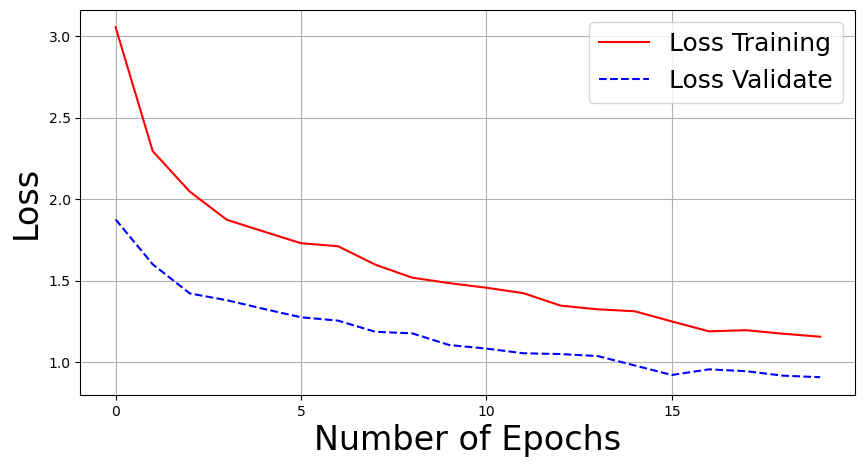

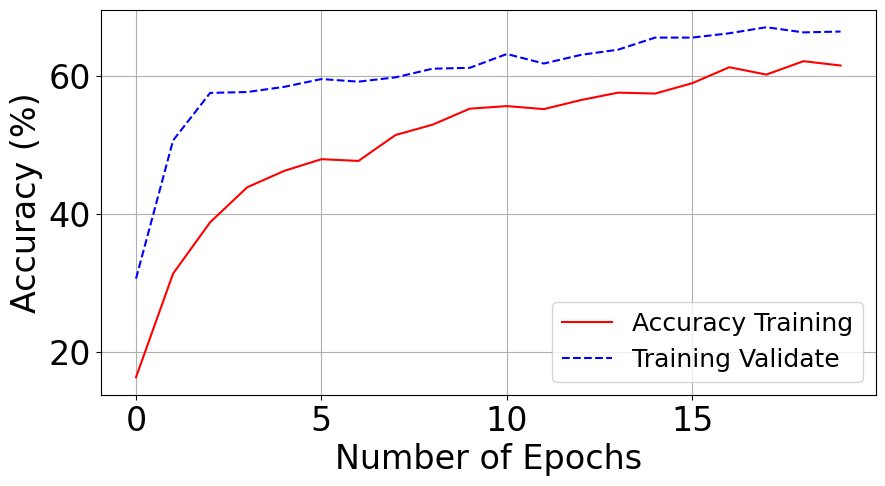

In [26]:
plotTraining(model_history,epochs,"loss")
plotTraining(model_history,epochs,"accuracy")
plotTraining(model_history,epochs,"val_loss")
plotTraining(model_history,epochs,"val_accuracy")

In [33]:
custom_model.save("model_VGG16.h5")

1/1 [==============================] - 1s 688ms/step
CLASS_03


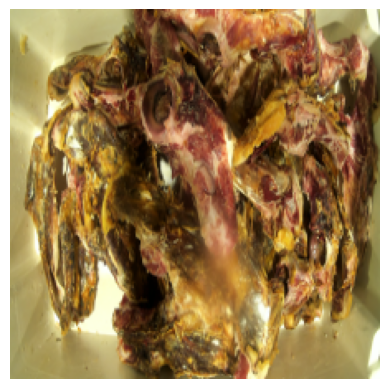

In [38]:
#Predicción usando el modelo entrenado
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model

names = ['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']

modelt = load_model("model_VGG16.h5")
#modelt = custom_model

imaget_path = r"C:\Users\msantacruz\Downloads\Github2023\Proyecto_Final_Tratamiento_MST\CarneDataset\07_captura.png"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


1/1 [==============================] - 1s 610ms/step
CLASS_03


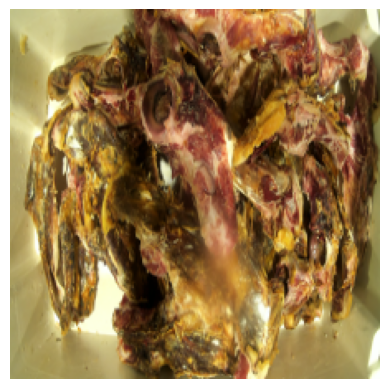

In [39]:
#Predicción usando el modelo entrenado_parte 2 
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model

names = ['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']

modelt = load_model("model_Mobilenet.h5")
#modelt = custom_model

imaget_path = r"C:\Users\msantacruz\Downloads\Github2023\Proyecto_Final_Tratamiento_MST\CarneDataset\07_captura.png"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found 810 images belonging to 8 classes.


C:\Users\msantacruz\AppData\Local\Temp\ipykernel_40220\2324816525.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = custom_Model.predict_generator(generator=test_generator)
C:\Users\msantacruz\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msantacruz\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msantacruz\AppData\Local\ana

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.0625    0.0208    0.0312        48
           2     0.3151    0.4742    0.3786        97
           3     0.0833    0.1333    0.1026        45
           4     0.8463    0.8519    0.8491       459
           5     0.3333    0.0526    0.0909        19
           6     0.4906    0.4561    0.4727       114
           7     0.4000    0.0741    0.1250        27

    accuracy                         0.6160       810
   macro avg     0.3164    0.2579    0.2563       810
weighted avg     0.6158    0.6160    0.6069       810



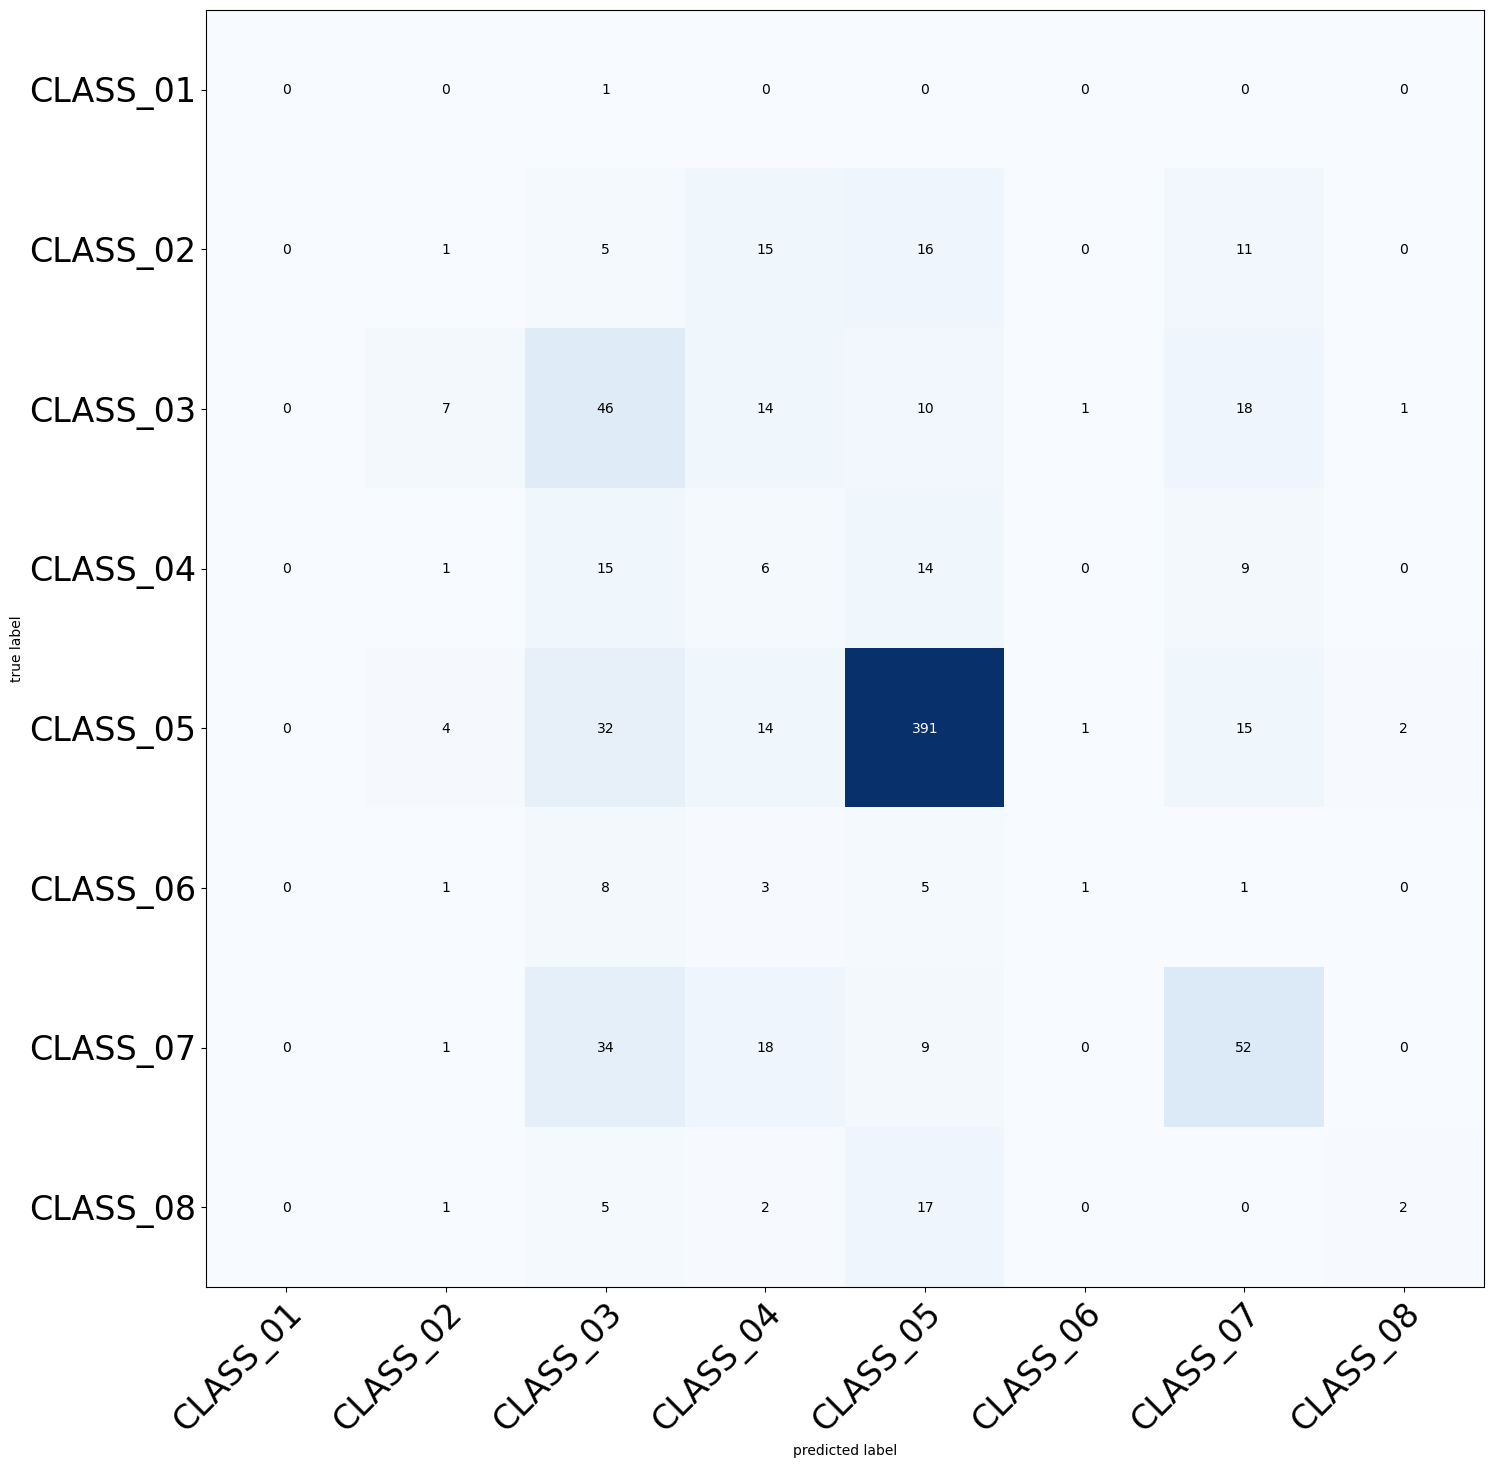

In [36]:
#Matriz de confusión y métricas de desempeño

from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

names = ['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']
test_data_dir = 'CarneDataset/test'

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("model_Mobilenet.h5")
#modelt = custom_model

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(15,15), class_names = names, show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))